# Convolutional Neural Networks

In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input, layers
from tensorflow.keras.callbacks import EarlyStopping

## Reminders about Dense Neural Networks

In [ ]:
# 1. ARCHITECTURE
model = Sequential()
model.add(Input(shape=(10, )))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# 2. COMPILATION
adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Classification with 2 classes
model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

# Classification with more classes
model.compile(loss='categorial_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

# Regression
# model.compile(loss='mse', optimizer=adam_opt, metrics=['mae'])

# 3. FIT
es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

# model.fit(X, y, batch_size=16, epochs=100, validation_split=0.3, callbackss=[es], verbose=0)
# Batch size -too small--> no generalization
#            -too large--> slow computations

## (3.3) CNN -> Keras syntax

In [14]:
model = Sequential()

model.add(Input(shape=(225, 225, 3)))

model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(4, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 223, 223, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 221, 221, 4)    │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 195364)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │       195,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195,753 (764.66 KB)

 Trainable params: 195,753 (764.66 KB)

 Non-trainable params: 0 (0.00 B)

## (3.4) Intuitions about Kernels

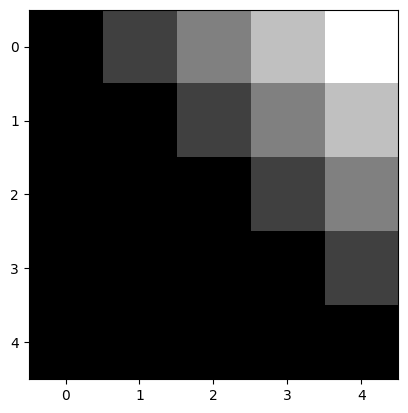

In [19]:
following_kernel = [
    [0,0.25,0.5,0.75,1],
    [0,0,0.25,0.5,0.75],
    [0,0,0,0.25,0.5],
    [0,0,0,0,0.25],
    [0,0,0,0,0]
]

plt.imshow(following_kernel, cmap = "gray")
plt.show()

## (4) Convolution hyperparameters

### (4.1) The strides

In [20]:
# Default stride = 1
model = Sequential()
model.add(Input(shape=(225, 225, 3)))
model.add(layers.Conv2D(16, (2, 2), strides=(1, 1), activation='relu'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Stride = 2
model = Sequential()
model.add(Input(shape=(225, 225, 3)))
model.add(layers.Conv2D(16, (2, 2), strides=(2, 2), activation="relu"))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 16)   │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

### (4.2) The padding

In [22]:
# padding='valid' : no-padding, the output is smaller than the input
model = Sequential()
model.add(Input(shape=(225, 225, 3)))
model.add(layers.Conv2D(16, (2, 2), padding='valid', activation='relu'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# padding='same' : padded with enough empty pixels to get an output of the *same* size as the input
model = Sequential()
model.add(Input(shape=(225, 225, 3)))
model.add(layers.Conv2D(16, (2, 2), padding='same', activation='relu'))
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 225, 225, 16)   │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

### (4.3) Pooling

In [24]:
# Good practice: After each convolution, add a MaxPooling layer
model = Sequential()
model.add(Input(shape=(225, 225, 3)))

model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 111, 111, 16)   │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,248 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Complete Model
model = Sequential()
model.add(Input(shape=(225, 225, 3)))

model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 111, 111, 16)   │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 48400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │       290,406 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291,661 (1.11 MB)

 Trainable params: 291,661 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compare the number of parameters with this dense model!
model2 = Sequential()

model2.add(Input(shape=(225, 225, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(6, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 151875)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │     2,430,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,397 (9.27 MB)

 Trainable params: 2,430,397 (9.27 MB)

 Non-trainable params: 0 (0.00 B)

## (5) Real-Case: Digits recognition

(60000, 28, 28)


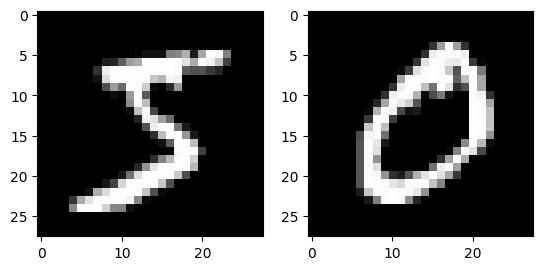

In [29]:
# Let's load the famous MNIST dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");
plt.show()

In [30]:
# Reshape the X to explicitly add a single "color" channel
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [32]:
# One Hot Encode our Target for TensorFlow processing
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train.shape

(60000, 10)

In [ ]:
# ——— CNN Version 1: Minimal Network
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(16, (4, 4), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 25, 25, 16)     │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │       100,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,282 (391.73 KB)

 Trainable params: 100,282 (391.73 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    X_train, 
    y_cat_train,
    epochs=50, # Use early stopping in practice
    batch_size=32,
    verbose=1,
    callbacks=es
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9799 - loss: 0.0646
Epoch 2/50
  38/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0468

C:\Users\luan.barbosa\AppData\Roaming\Python\Python313\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0432
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9887 - loss: 0.0349
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9916 - loss: 0.0261
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0212
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0171
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0122
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9971 - loss: 0.0087
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9974 - loss: 0.0078
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━

In [40]:
# We now evaluate on the test data
model.evaluate(X_test, y_cat_test, verbose=0)

[0.08347208797931671, 0.9901000261306763]

In [41]:
# ——— CNN Version 2: Common Tricks
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (2, 2), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu')) # intermediate layer
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 14, 14, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │        78,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,200 (317.19 KB)

 Trainable params: 81,200 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
es = EarlyStopping(patience=1, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    X_train, 
    y_cat_train,
    epochs=10, # Use early stopping in practice
    batch_size=32,
    verbose=1,
    callbacks=es
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9442 - loss: 0.1825
Epoch 2/10
  37/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0714

C:\Users\luan.barbosa\AppData\Roaming\Python\Python313\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0585
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0425
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9894 - loss: 0.0336
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9915 - loss: 0.0262
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9931 - loss: 0.0215
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0169
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0144
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9962 - loss: 0.0116
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9963 - loss: 0.0104


In [43]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.03742920607328415, 0.9896000027656555]

In [44]:
# ——— CNN Version III: Preprocessing layers and regularization
# Reload raw data
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

model_pipe = Sequential([
    Input(shape=(28, 28, 1)),
    layers.Reshape((28, 28, 1)),
    layers.Rescaling(scale=1./255.),
    layers.Conv2D(16, (3, 3), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(32, (2, 2), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 14, 14, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │        78,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,602 (951.57 KB)

 Trainable params: 81,200 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 162,402 (634.39 KB)

In [45]:
es = EarlyStopping(patience=1, restore_best_weights=True)

model_pipe.compile(loss='sparse_categorical_crossentropy', # No need to OHE target
                    optimizer='adam',
                    metrics=['accuracy'])
model_pipe.fit(X_train_raw, y_train_raw,
    epochs=1,
    batch_size=32,
    verbose=1,
    callbacks=es
)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9090 - loss: 0.2955


C:\Users\luan.barbosa\AppData\Roaming\Python\Python313\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


In [46]:
model_pipe.evaluate(X_test_raw, y_test_raw, verbose=0)

[0.0701209008693695, 0.9779999852180481]

### (5.2) Insights from the model

In [47]:
# Let's focus on the first convolutional layer
layer_1 = model.layers[0]
layer_1

<Conv2D name=conv2d_26, built=True>

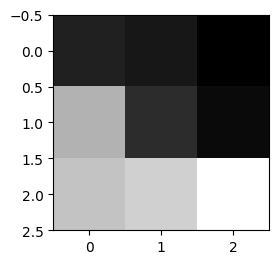

In [52]:
# You can access its 16 kernels. Let's print the last one
plt.figure(figsize=(2.8, 2.8))
plt.imshow(layer_1.weights[0][:,:,:,15], cmap='gray')
plt.show()

In [53]:
# We can also compute the output of the first layer (called its activation)
# By calling it with a "batch" of images (let's take 10)
batch = X_train[0:10]
activation_1 = layer_1(batch)
activation_1.shape

TensorShape([10, 28, 28, 16])

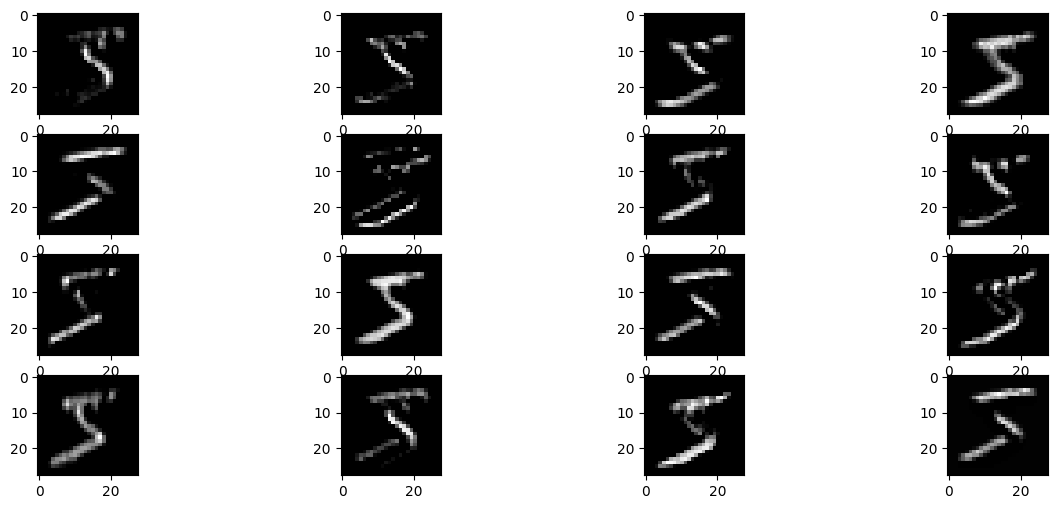

In [59]:
# Let's display all 16 channels' outputs of the first layer, applied to the first image only
fig, axs = plt.subplots(4,4, figsize=(15,6))
for i in range(4):
    for j in range(4):
        feature_map = activation_1[0,:,:,4*i+j]
        axs[i,j].imshow(feature_map, cmap='gray')